In [1]:
import tensorflow as tf
import pandas as pd
import math
from tensorflow import keras

SHUFFLE_BUFFER = 500
BATCH_SIZE = 36
EPOCHS = 100

/Users/ushirraval/Workspace/cos711-a2/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data = pd.read_csv('data/prepared_data.csv')

TRAINING_SIZE = math.floor(0.5*len(data))
TEST_SIZE = math.floor(0.3*len(data))
EVALUATION_SIZE = math.floor(0.2*len(data))

indices = (TRAINING_SIZE, TRAINING_SIZE+TEST_SIZE, TRAINING_SIZE+TEST_SIZE+EVALUATION_SIZE)
inputs = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']
outputs = ['class_GALAXY','class_QSO','class_STAR']

training = data[0:indices[0]]
test = data[indices[0]:indices[1]]
evaluation = data[indices[1]:indices[2]]
professor = {
	"training": {
		"questions": training[inputs],
		"answers": training[outputs]
	},
	"test": {
		"questions": test[inputs],
		"answers": test[outputs]
	},
	"evaluation": {
		"questions": evaluation[inputs],
		"answers": evaluation[outputs]
	}
}

In [3]:
normalizer = keras.layers.Normalization(axis=-1)
normalizer.adapt(data[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']])

model = keras.Sequential([
	normalizer,
	keras.layers.Dense(9, activation='relu'),
	keras.layers.Dense(9, activation='relu'),
	keras.layers.Dense(3, activation='sigmoid')
])

model.compile(
	optimizer='sgd',
	loss=keras.losses.BinaryCrossentropy(),
	metrics=['accuracy']
)

history = model.fit(professor['training']['questions'], professor['training']['answers'], validation_data=(professor['test']['questions'], professor['test']['answers']), epochs=EPOCHS, batch_size=BATCH_SIZE)

2021-11-01 00:31:26.982328: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-01 00:31:27.023228: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
139/139 [==============================] - 2s 7ms/step - loss: 0.6824 - accuracy: 0.3884 - val_loss: 0.6560 - val_accuracy: 0.3827
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.3888 - val_loss: 0.6347 - val_accuracy: 0.4127
Epoch 3/100
139/139 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.4500 - val_loss: 0.6224 - val_accuracy: 0.4890
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.5092 - val_loss: 0.6145 - val_accuracy: 0.5253
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.5290 - val_loss: 0.6089 - val_accuracy: 0.5430
Epoch 6/100
139/139 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.5394 - val_loss: 0.6046 - val_accuracy: 0.5567
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.5468 - val_loss: 0.6013 - val_accuracy: 0.5633

In [4]:
model.evaluate(professor["evaluation"]["questions"], professor['evaluation']['answers'])

63/63 [==============================] - 0s 1ms/step - loss: 0.3829 - accuracy: 0.9550


[0.38290801644325256, 0.9549999833106995]

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 8)                 17        
_________________________________________________________________
dense (Dense)                (None, 9)                 81        
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 30        
Total params: 218
Trainable params: 201
Non-trainable params: 17
_________________________________________________________________


In [6]:
evaluation.head(5)

,Unnamed: 0,ra,dec,u,g,r,i,z,redshift,class_GALAXY,class_QSO,class_STAR
8000,8000,0.190349,-0.599724,-0.079026,-0.204305,-0.154887,-0.110684,-0.030056,-0.370001,0.1,0.1,0.9
8001,8001,0.188651,-0.598305,0.745707,0.702019,0.629892,0.602372,0.601848,-0.367239,0.1,0.1,0.9
8002,8002,0.190667,-0.604786,1.004693,0.648648,0.312791,0.092810,-0.032583,-0.091988,0.9,0.1,0.1
8003,8003,0.191552,-0.603357,0.394077,1.518491,1.645257,1.595851,1.568480,3.531147,0.1,0.9,0.1
8004,8004,0.191230,-0.598623,-1.215336,-1.586335,-1.722162,-1.761351,-1.850619,-0.164494,0.9,0.1,0.1


In [7]:
model.__call__(professor['evaluation']['questions'].head(5))

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.17879936, 0.08531305, 0.8272298 ],
       [0.3452379 , 0.08443668, 0.67007244],
       [0.9024625 , 0.10329384, 0.09015858],
       [0.12687007, 0.8922597 , 0.08225214],
       [0.8672509 , 0.11194041, 0.11525351]], dtype=float32)>

In [8]:
# def create_model(input_shape=11, output_shape=3):
#     m = keras.Sequential(
#         [
#             tf.keras.layers.Dense(40, activation='relu', input_dim=input_shape),  # input shape required
#             tf.keras.layers.Dense(40, activation='relu'),
#             tf.keras.layers.Dense(20, activation='relu'),
#             tf.keras.layers.Dense(output_shape, activation='softmax')
#         ]
#     )
#     return m
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=3e-5,
#     decay_steps=10000,
#     decay_rate=0.9
# )
# optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
# # Instantiate a loss function.
# loss_fn = keras.losses.CategoricalCrossentropy(from_logits=True)
# model = create_model(8)
# model.compile(loss=loss_fn, optimizer='sgd', metrics=["accuracy"])
# history = model.fit(professor['training']['questions'], professor['training']['answers'], validation_data=(professor['test']['questions'], professor['test']['answers']), batch_size=36, epochs=50, verbose=1)

In [9]:
history

Text(0.5, 1.0, 'Training and Validation Accuracy')

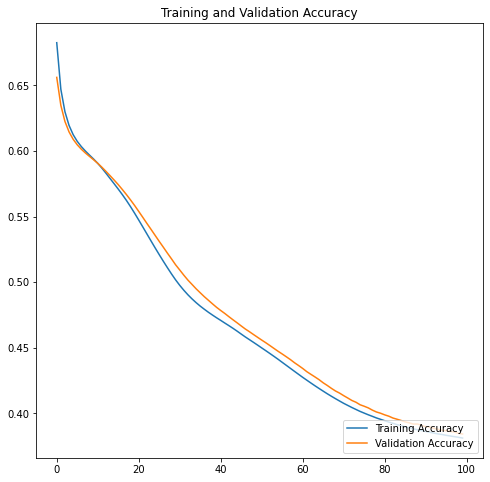

In [12]:

import matplotlib.pyplot as plt
epochs_range = range(EPOCHS)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history["loss"], label='Training Accuracy')
plt.plot(epochs_range, history.history["val_loss"], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [11]:
import pickle
with open("simple_model.pkl", "a") as f:
	pickle.dump(model, f)

AttributeError: Can't pickle local object 'PreprocessingLayer.make_adapt_function.<locals>.adapt_step'